In [15]:
# imports
import cobra
from cobra.io import read_sbml_model
import pathlib
import os
import matplotlib.pyplot as plt
from matplotlib import rc

In [7]:
current_dir = pathlib.Path(os.getcwd())
model_dir = current_dir.parent / "models"

In [8]:
# load sMOMENT models
models = {
    "A375_10": read_sbml_model(model_dir / "A375_1+0_sMOMENT_model.xml"),
    "A375_10_05": read_sbml_model(model_dir / "A375_1+0_sMOMENT_05_model.xml"),
    "A375_10_pool": read_sbml_model(model_dir / "A375_1+0_sMOMENT_pool_model.xml"),
    "A375_11": read_sbml_model(model_dir / "A375_1+1_sMOMENT_model.xml"),
    "A375_11_05": read_sbml_model(model_dir / "A375_1+1_sMOMENT_05_model.xml"),
    "A375_11_pool": read_sbml_model(model_dir / "A375_1+1_sMOMENT_pool_model.xml"),
    "A375_human1": read_sbml_model(model_dir / "A375_human1_sMOMENT_model.xml")
}

In [9]:
# get fba solutions
print("FBA-solutions:")
fba_solutions = {}
for mdl_name, mdl in models.items():
    fba_solutions[mdl_name] = mdl.slim_optimize()
print(fba_solutions)

FBA-solutions:
{'A375_10': 0.4753331467433929, 'A375_10_05': 0.9506662934867885, 'A375_10_pool': 4.503605235212296, 'A375_11': 0.4870004118685573, 'A375_11_05': 0.08598518075819589, 'A375_11_pool': 0.05719174197320924, 'A375_human1': 1.564702760415956}


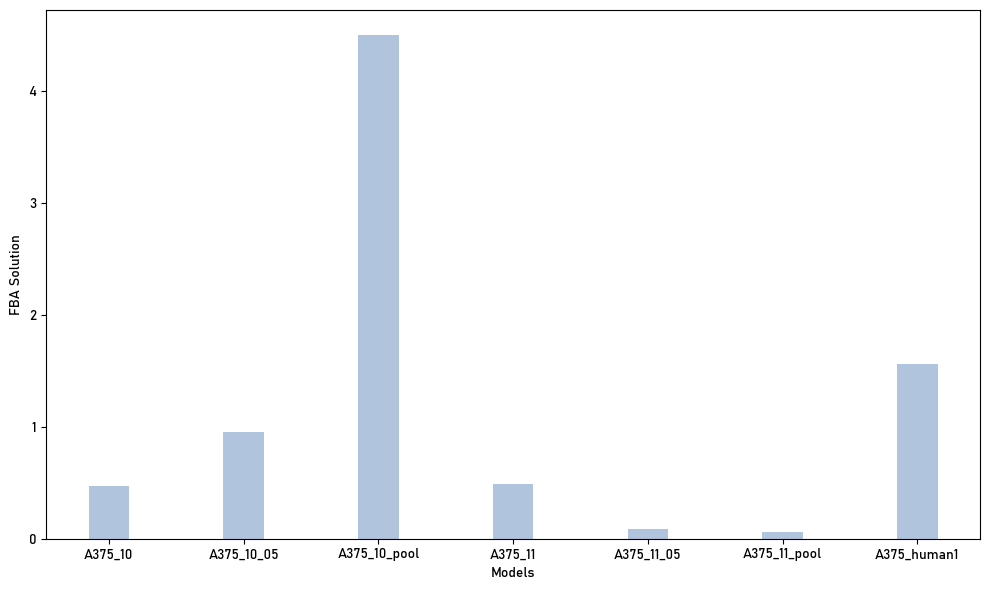

In [ ]:

rc("font", family="Bahnschrift")

y_values = fba_solutions.values()
x_labels = fba_solutions.keys()

x = list(range(len(x_labels)))  # Create a range for the x-axis positions

# Bar width
bar_width = 0.3

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
ax.bar(x, y_values, width=bar_width, color='lightsteelblue')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('FBA Solution')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Show the plot
plt.tight_layout()
plt.savefig(current_dir.parent / "outputs" / "fba_comparison_sMOMENT_models.png")
plt.show()


<Figure size 640x480 with 0 Axes>